# Capstone Project - BFS

## Business understanding
### CredX is a leading credit card provider that gets thousands of credit card applications every year. But in the past few years, it has experienced an increase in credit loss. The CEO believes that the best strategy to mitigate credit risk is to ‘acquire the right customers’.

### In this project, your task is to help CredX identify the right customers using predictive models. Using past data of the bank’s applicants, you need to determine the factors affecting credit risk, create strategies to mitigate the acquisition risk and assess the financial benefit of your project. 

In [151]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [152]:
demographic_df = pd.read_csv("Demographic data.csv")
demographic_df.head(10)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,52,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,41,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,40,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,58,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,57,0.0


In [153]:
credit_df= pd.read_csv("Credit Bureau data.csv")
credit_df.head(5)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


### Data Understanding and Cleaning

In [154]:
#Sanity Check
print(demographic_df.shape)
demographic_df.info()

(71295, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage

In [155]:
# Select all duplicate rows based on all columns
duplicateRowsDF = demographic_df[demographic_df.duplicated(['Application ID'],keep=False)]
duplicateRowsDF

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
5243,653287861,26,M,Married,3.0,25.0,Bachelor,SAL,Rented,112,58,0.0
24386,765011468,57,M,Single,4.0,4.5,Bachelor,SAL,Company provided,6,56,0.0
27586,765011468,38,M,Married,4.0,4.5,Professional,SAL,Rented,6,72,0.0
42637,653287861,40,M,Married,5.0,32.0,Phd,SE,Rented,45,46,1.0
48602,671989187,27,M,Married,2.0,35.0,Professional,SAL,Living with Parents,108,7,0.0
59022,671989187,57,M,Married,4.0,7.0,Professional,SE,Rented,42,3,0.0


In [156]:
#Removing Dublicate rows as the rest of the columns have different values and total number of dublicates is less.
demographic_df.drop_duplicates(subset ="Application ID", 
                     keep = False, inplace = True)

In [157]:
#Percentage of column-wise missing values
round((demographic_df.isnull().sum()/len(demographic_df.index))*100,2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [158]:
#Removing the records with missing "Performance Tag" as it is the target variable
df = demographic_df[~np.isnan(demographic_df['Performance Tag'])]

In [159]:
#Percentage of column-wise missing values
round((df.isnull().sum()/len(df.index))*100,2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                0.00
dtype: float64

In [160]:
print(df['Profession '].value_counts())
print(df['Type of residence'].value_counts())
print(df['Marital Status (at the time of application)'].value_counts())

SAL        39670
SE_PROF    16256
SE         13925
Name: Profession , dtype: int64
Rented                 52276
Owned                  14003
Living with Parents     1777
Company provided        1602
Others                   198
Name: Type of residence, dtype: int64
Married    59542
Single     10316
Name: Marital Status (at the time of application), dtype: int64


In [161]:
df.loc[pd.isnull(df['Profession ']),['Profession ']] = 'SAL'
df.loc[pd.isnull(df['Type of residence']),['Type of residence']] = 'Rented'
df.loc[pd.isnull(df['Marital Status (at the time of application)']),['Marital Status (at the time of application)']] = 'Married'

C:\Users\HELLO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [162]:
#Percentage of column-wise missing values
round((df.isnull().sum()/len(df.index))*100,2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.00
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.00
Type of residence                              0.00
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                0.00
dtype: float64

In [163]:
df['Education'].value_counts()

Professional    24383
Masters         23481
Bachelor        17300
Phd              4463
Others            119
Name: Education, dtype: int64

In [164]:
d0 = df.groupby('Education', as_index=False).agg({"Performance Tag": ["count", "mean"]})
d0

Education Performance Tag          
                          count      mean
0      Bachelor           17300  0.042890
1       Masters           23481  0.042502
2        Others             119  0.067227
3           Phd            4463  0.041004
4  Professional           24383  0.041463

In [165]:
x = df.loc[pd.isnull(df['Education']),['Performance Tag']]
x.mean()

Performance Tag    0.042373
dtype: float64

In [166]:
#Since the event rates for Missing Values are close with Bachelor, lets assign missing values to Bachelor
df.loc[pd.isnull(df['Education']),['Education']] = 'Bachelor'

C:\Users\HELLO\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [167]:
df['Education'].value_counts()

Professional    24383
Masters         23481
Bachelor        17418
Phd              4463
Others            119
Name: Education, dtype: int64

In [168]:
#Renaming Columns in the DataFrame
df.columns=['Application_ID','Age','Gender','Marital_Status','No_of_dependents','Income','Education','Profession','Type_of_residence','Months_in_current_residence',
           'Months_in_current_company','Event']
df.head(5)

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,Months_in_current_company,Event
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69864 entries, 0 to 71294
Data columns (total 12 columns):
Application_ID                 69864 non-null int64
Age                            69864 non-null int64
Gender                         69862 non-null object
Marital_Status                 69864 non-null object
No_of_dependents               69861 non-null float64
Income                         69864 non-null float64
Education                      69864 non-null object
Profession                     69864 non-null object
Type_of_residence              69864 non-null object
Months_in_current_residence    69864 non-null int64
Months_in_current_company      69864 non-null int64
Event                          69864 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.4+ MB


In [170]:
print(df.loc[pd.isnull(df['Gender']) | pd.isnull(df['No_of_dependents']),'Event'])

4674     0.0
39501    0.0
43415    0.0
55578    0.0
69026    0.0
Name: Event, dtype: float64


In [171]:
# Since these are not default, removing them from the data.
df2 = df.loc[~pd.isnull(df['Gender'])]
df3 = df2[~np.isnan(df['No_of_dependents'])]
df = pd.DataFrame(df3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69859 entries, 0 to 71294
Data columns (total 12 columns):
Application_ID                 69859 non-null int64
Age                            69859 non-null int64
Gender                         69859 non-null object
Marital_Status                 69859 non-null object
No_of_dependents               69859 non-null float64
Income                         69859 non-null float64
Education                      69859 non-null object
Profession                     69859 non-null object
Type_of_residence              69859 non-null object
Months_in_current_residence    69859 non-null int64
Months_in_current_company      69859 non-null int64
Event                          69859 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB


C:\Users\HELLO\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


# Exploratory Data Analysis

In [172]:
def plot_event_rate(df,target):
    sns.set(rc={'figure.figsize':(2,4)})
    total = float(len(df[target]))
    ax = sns.countplot(x=target,data=df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
             height + 3,
             '{:1.2f}'.format(height/total),
             ha="right")
    plt.show()

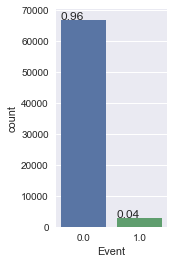

In [173]:
plot_event_rate(df,'Event')

### Default rate is 4%

In [174]:
#Functions for plotting the categorical Variables
def plot_categorical_variables(data,category,target):
    d0 = pd.DataFrame({'x': data[category], 'y': data[target]})
    length = len(d0.index)
    d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
    d.columns=[category,'Count','Event']
    d['Event Rate'] = d['Event']/d['Count']
    d['Weighted Event Rate'] = d['Count']*d['Event Rate']/length
    
    sns.set(rc={'figure.figsize':(14,9)})
    plt.subplot(2, 2, 1)
    sns.countplot(x=category, data=data.loc[data[target]==0])
    plt.title("No of Good")
    
    plt.subplot(2, 2, 2)
    sns.countplot(x=category, data=data.loc[data[target]==1])
    plt.title("No of Bad")
    
    plt.subplot(2, 2, 3)
    sns.barplot(x=category,y='Event Rate',data=d)
    plt.title("Event Rate")

    plt.subplot(2, 2, 4)
    sns.barplot(x=category,y='Weighted Event Rate',data=d)
    plt.title("Weighted Event Rate")

In [175]:
#Function to plot numerical average for all good and bad in the data
def plot_numeric_averages(data,numeric,target):
    d0 = pd.DataFrame({'x': data[numeric], 'y': data[target]})
    length = len(d0.index)
    d0.y.astype=['object']
    d = d0.groupby("y", as_index=False).agg({"x": ["mean"]})
    d.columns=[target,'Average']
    
    sns.set(rc={'figure.figsize':(5,5)})
    plt.title(numeric)
    sns.barplot(x=target,y='Average',data=d)
    plt.show()
    return d

#### Analyzing "Age"

In [176]:
df['Age'].nunique()

53

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


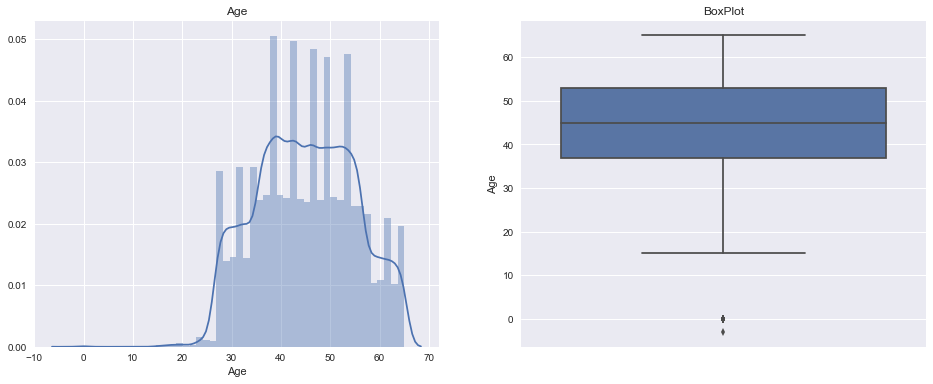

In [177]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Age')
sns.distplot(df['Age'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=df['Age'])

In [178]:
#Clearly there are outliers in the Age Column.
df.loc[df['Age']<15].count()

Application_ID                 18
Age                            18
Gender                         18
Marital_Status                 18
No_of_dependents               18
Income                         18
Education                      18
Profession                     18
Type_of_residence              18
Months_in_current_residence    18
Months_in_current_company      18
Event                          18
dtype: int64

In [179]:
df['Age'].describe(percentiles=[0.05,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,1])

count    69859.000000
mean        44.997366
std          9.927111
min         -3.000000
5%          29.000000
10%         31.000000
20%         36.000000
25%         37.000000
50%         45.000000
75%         53.000000
80%         54.000000
90%         58.000000
95%         62.000000
100%        65.000000
max         65.000000
Name: Age, dtype: float64

In [180]:
#Lets replace the low values of age with 5th percentile value
df.loc[df['Age']<15,'Age'] = 29

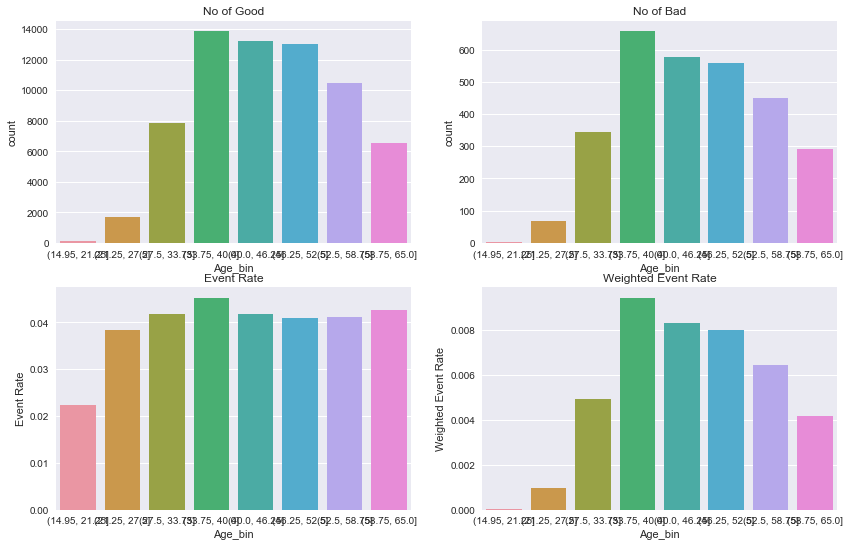

In [181]:
df['Age_bin'] = pd.cut(df['Age'],bins=8)
plot_categorical_variables(df,'Age_bin','Event')

#### Event Rate seems to be similar between ages 28-60. But number who opted for loan have age between 33 and 55.


In [182]:
df.drop('Age_bin',inplace=True,axis=1)

#### Analyzing "Gender"

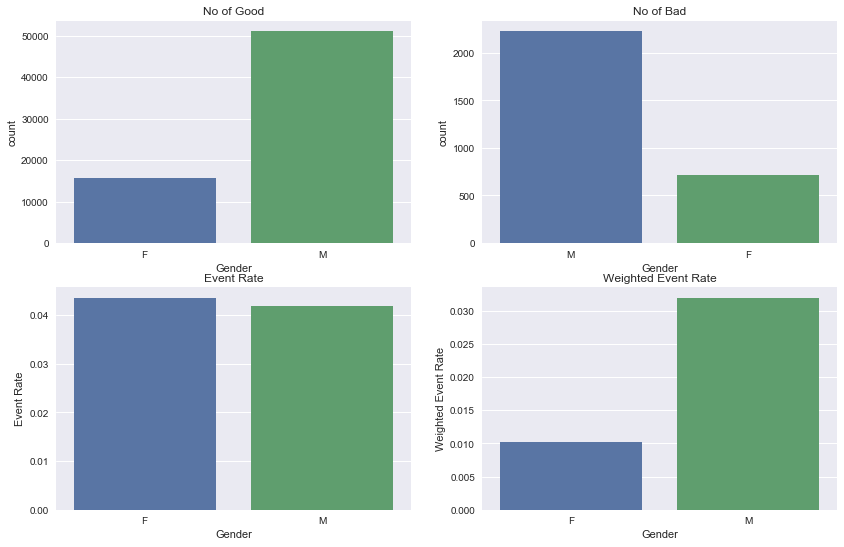

In [183]:
plot_categorical_variables(df,'Gender','Event')

#### Both Male and Female have similar default rate. But more number of males have opted for credit cards than females

#### Analyzing "Marital Status"

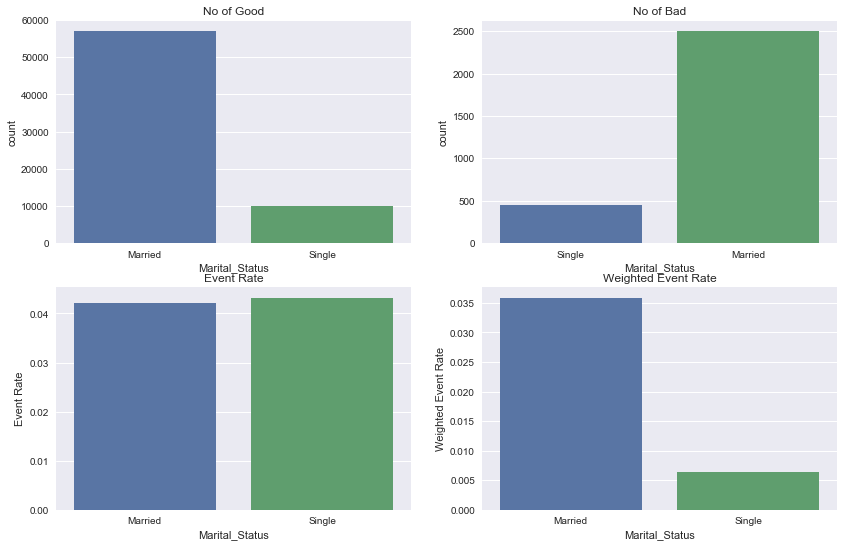

In [184]:
plot_categorical_variables(df,'Marital_Status','Event')

#### Both Married and Singles have similar default rate. But more number of Married have opted for credit cards than Single people

In [185]:
df['No_of_dependents'].unique()

array([2., 4., 1., 5., 3.])

#### Analyzing "No_of_Dependents"

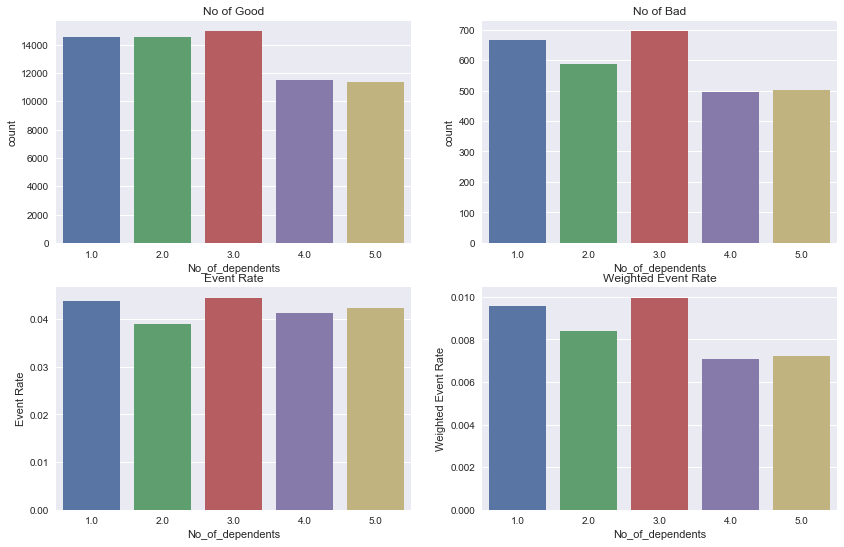

In [186]:
df['No_of_dependents'].astype='object'
plot_categorical_variables(df,'No_of_dependents','Event')

#### People with 1 or 3 dependents have slightly higher default rates than others and most number of applicants have 1 to 3 dependents

#### Analyzing "Income"

In [187]:
df['Income'].nunique()

63

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


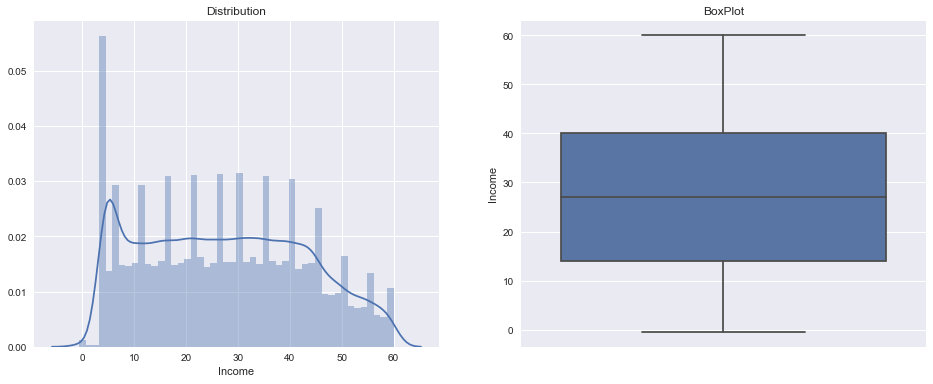

In [188]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(df['Income'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=df['Income'])

In [189]:
# There does not seem to be an outlier in the Income. Lets bin it and plot against the Event

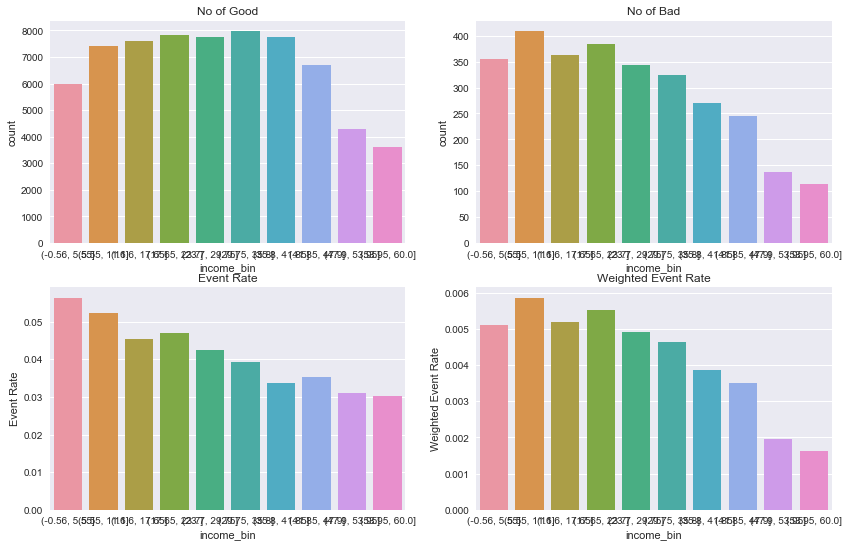

In [190]:
df['income_bin'] = pd.cut(df['Income'],bins=10)
plot_categorical_variables(df,'income_bin','Event')

In [191]:
df.drop(['income_bin'],axis=1,inplace=True)

#### Applicants with income less than 30 seem to have higher default rate than others.

#### Analyzing "Education"

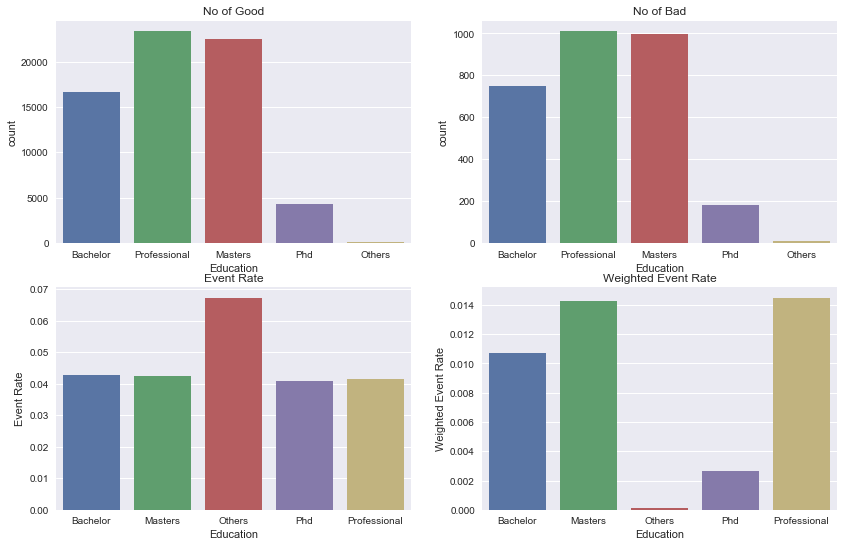

In [192]:
plot_categorical_variables(df,'Education','Event')

#### Applicants with "Others" Education have higher default rate. But the weightage is very less. Applicants who are Professional or have Masters degree slightly lower default rate but have higher weightage than others.

#### Analyzing "Profession"

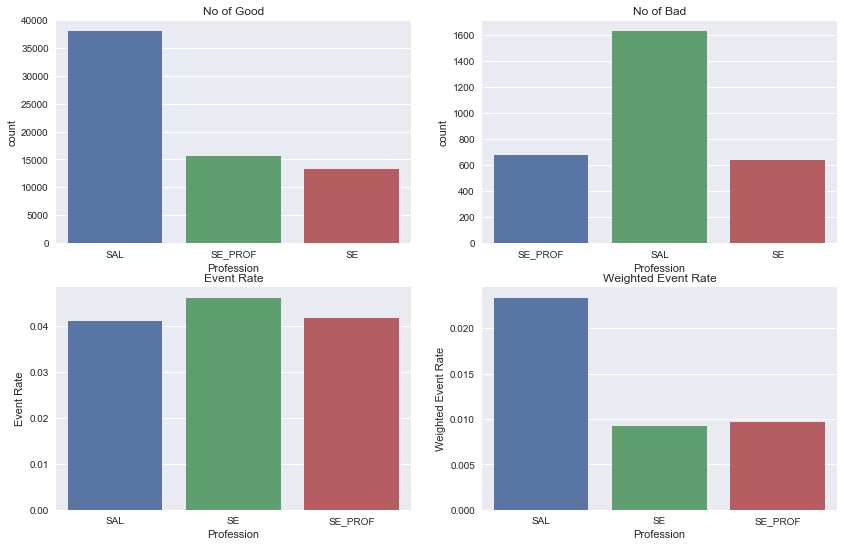

In [193]:
plot_categorical_variables(df,'Profession','Event')

#### Default rate for all profession is similar. But Applicants with "Salaried" Profession have higher weightage.

#### Analyzing 'Type_of_residence'

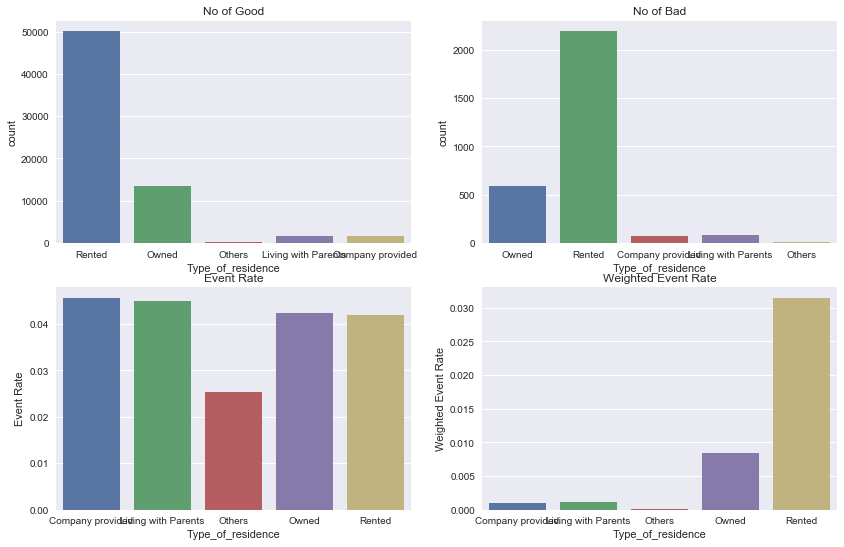

In [194]:
plot_categorical_variables(df,'Type_of_residence','Event')

#### Clearly, "rented" type of residence have higher weightage over all others

#### Analyzing "Months_in_current_residence"

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


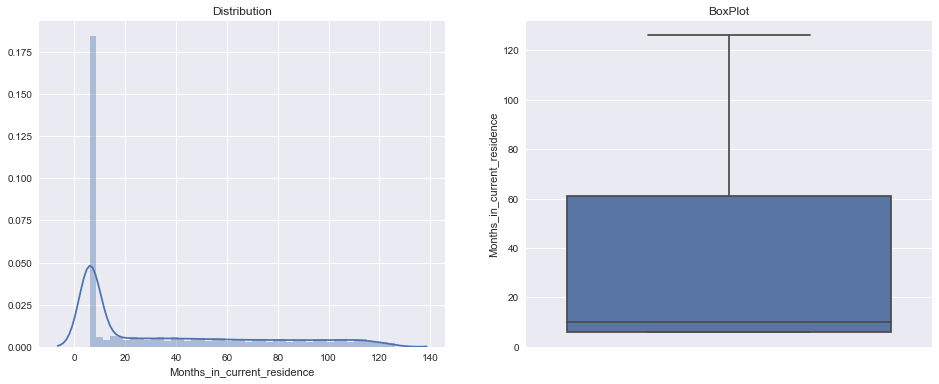

In [195]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(df['Months_in_current_residence'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=df['Months_in_current_residence'])

In [196]:
#Data is left skewed.Lets print the percentiles
df['Months_in_current_residence'].describe(percentiles=[0.05,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,1])

count    69859.000000
mean        34.605563
std         36.844405
min          6.000000
5%           6.000000
10%          6.000000
20%          6.000000
25%          6.000000
50%         10.000000
75%         61.000000
80%         73.000000
90%         98.000000
95%        110.000000
100%       126.000000
max        126.000000
Name: Months_in_current_residence, dtype: float64

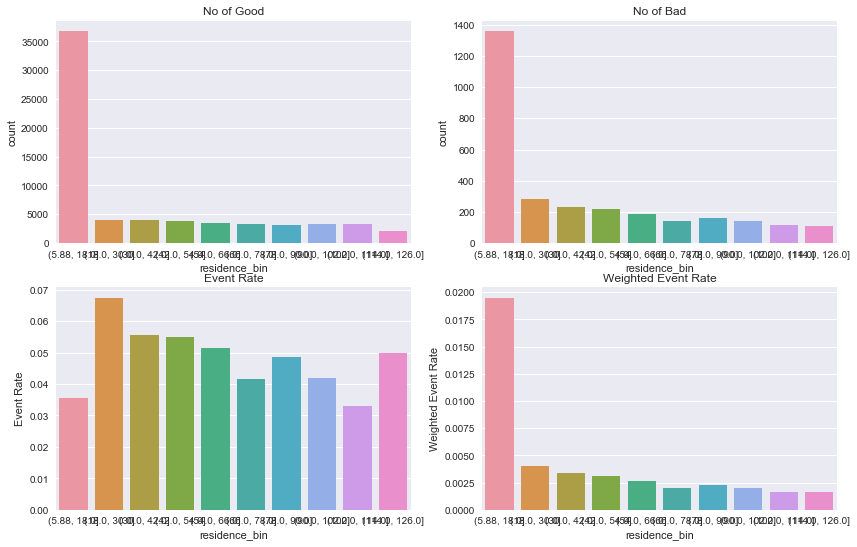

In [197]:
df['residence_bin'] = pd.cut(df['Months_in_current_residence'],bins=10)
plot_categorical_variables(df,'residence_bin','Event')

#### Since the data is left skewed, applicant with less than 20 months have higher weightage. But the default rate is higher for apllicants whose month of residence count is between 20 and 50

#### Analyzing "Months_in_current_company"

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


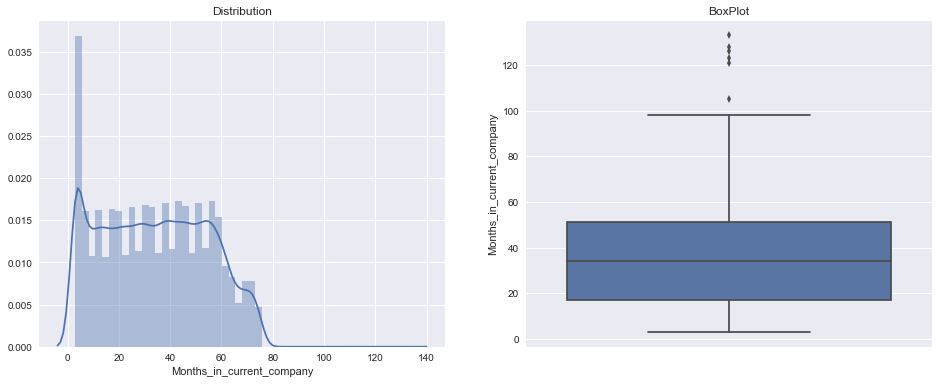

In [198]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(df['Months_in_current_company'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=df['Months_in_current_company'])

In [199]:
#There are outliers in the data, lets print the percentiles
df['Months_in_current_company'].describe(percentiles=[0.05,0.1,0.2,0.25,0.5,0.75,0.8,0.9,0.95,1])

count    69859.000000
mean        34.198815
std         20.349657
min          3.000000
5%           3.000000
10%          6.000000
20%         13.000000
25%         17.000000
50%         34.000000
75%         51.000000
80%         54.000000
90%         62.000000
95%         68.000000
100%       133.000000
max        133.000000
Name: Months_in_current_company, dtype: float64

In [200]:
df.loc[df['Months_in_current_company']>68,'Months_in_current_company'] = 68

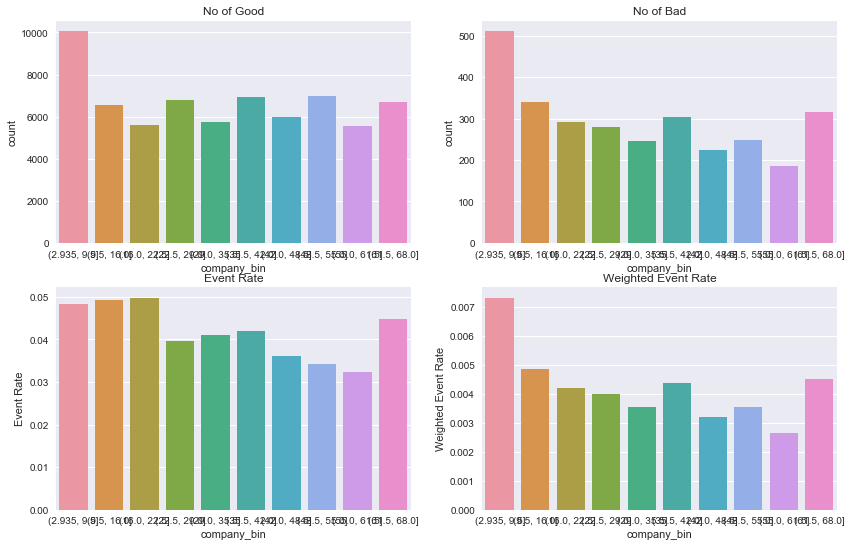

In [201]:
df['company_bin'] = pd.cut(df['Months_in_current_company'],bins=10)
plot_categorical_variables(df,'company_bin','Event')

#### Applicants with less than 22 months in current company have higher default rates and weightage

In [202]:
df.drop(['residence_bin','company_bin'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69859 entries, 0 to 71294
Data columns (total 12 columns):
Application_ID                 69859 non-null int64
Age                            69859 non-null int64
Gender                         69859 non-null object
Marital_Status                 69859 non-null object
No_of_dependents               69859 non-null float64
Income                         69859 non-null float64
Education                      69859 non-null object
Profession                     69859 non-null object
Type_of_residence              69859 non-null object
Months_in_current_residence    69859 non-null int64
Months_in_current_company      69859 non-null int64
Event                          69859 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 9.4+ MB


## WOE and IV calculation

In [203]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target,'Application_ID'])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = round(np.log(d['% of Events']/d['% of Non-Events']),4)
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [204]:
iv,woe = iv_woe(df,target='Event',show_woe=False)
#iv.to_csv("IV.csv")
#woe.to_csv("Woe.csv")

Information value of Age is 0.004143
Information value of Gender is 0.000326
Information value of Marital_Status is 9.5e-05
Information value of No_of_dependents is 0.002655
Information value of Income is 0.042825
Information value of Education is 0.000784
Information value of Profession is 0.002229
Information value of Type_of_residence is 0.000925
Information value of Months_in_current_residence is 0.070742
Information value of Months_in_current_company is 0.022821


In [205]:
df2 = pd.DataFrame(df)

In [206]:
master_df = df2.merge(credit_df,left_on='Application_ID',right_on='Application ID',how='inner')
print(master_df.shape)
master_df.head(5)

(69859, 31)


,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [207]:
df = pd.DataFrame(df2)

In [208]:
df['Gender'] = df['Gender'].map({'F':woe.loc[woe['Cutoff']=='F','WoE'].values[0],'M':woe.loc[woe['Cutoff'] == 'M','WoE'].values[0]})

In [209]:
df['Education'].unique()

array(['Bachelor', 'Professional', 'Masters', 'Phd', 'Others'],
      dtype=object)

In [210]:
df['Marital_Status'] = df['Marital_Status'].map({'Married':woe.loc[woe['Cutoff']=='Married','WoE'].values[0],
                                                 'Single':woe.loc[woe['Cutoff'] == 'Single','WoE'].values[0]})
df['Profession'] = df['Profession'].map({'SAL':woe.loc[woe['Cutoff']=='SAL','WoE'].values[0],
                                         'SE_PROF':woe.loc[woe['Cutoff'] == 'SE_PROF','WoE'].values[0],
                                         'SE':woe.loc[woe['Cutoff'] == 'SE','WoE'].values[0]
                                        })
df['Type_of_residence'] = df['Type_of_residence'].map({'Rented':woe.loc[woe['Cutoff']=='Rented','WoE'].values[0],
                                         'Owned':woe.loc[woe['Cutoff'] == 'Owned','WoE'].values[0],
                                         'Others':woe.loc[woe['Cutoff'] == 'Others','WoE'].values[0],
                                         'Living with Parents':woe.loc[woe['Cutoff'] == 'Living with Parents','WoE'].values[0],
                                         'Company provided':woe.loc[woe['Cutoff'] == 'Company provided','WoE'].values[0]
                                        })
df['Education'] = df['Education'].map({'Bachelor':woe.loc[woe['Cutoff']=='Bachelor','WoE'].values[0],
                                         'Professional':woe.loc[woe['Cutoff'] == 'Professional','WoE'].values[0],
                                         'Masters':woe.loc[woe['Cutoff'] == 'Masters','WoE'].values[0],
                                         'Phd':woe.loc[woe['Cutoff'] == 'Phd','WoE'].values[0],
                                         'Others':woe.loc[woe['Cutoff'] == 'Others','WoE'].values[0],
                                        })

In [211]:
df.head()

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,Months_in_current_company,Event
0,954457215,48,0.0322,-0.0041,2.0,40.0,0.0173,-0.0284,-0.0045,113,56,0.0
1,432830445,31,-0.0101,-0.0041,4.0,55.0,-0.0180,-0.0133,-0.0045,112,46,0.0
2,941387308,32,-0.0101,0.0233,2.0,46.0,0.0173,-0.0133,-0.0045,104,49,0.0
3,392161677,43,-0.0101,-0.0041,1.0,53.0,0.0173,0.0914,-0.0045,94,53,0.0
4,182011211,35,0.0322,-0.0041,5.0,44.0,-0.0180,-0.0284,-0.0045,112,43,0.0


# Modeling using only the demographic data

In [212]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [213]:
# Putting feature variable to X
X = df.drop(['Event','Application_ID'],axis=1)

# Putting response variable to y
y = df['Event']

In [214]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

#### Standardisation

In [215]:
X_train.head()

,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,Months_in_current_company
1771,29,-0.0101,0.0233,3.0,35.0,0.0173,-0.0284,0.0807,74,29
10564,47,-0.0101,-0.0041,1.0,47.0,0.0173,0.0914,0.0041,6,3
50935,61,-0.0101,-0.0041,2.0,41.0,0.0079,-0.0284,-0.0045,15,33
65667,52,-0.0101,-0.0041,4.0,4.5,-0.0296,0.0914,-0.0045,122,23
10406,48,-0.0101,-0.0041,2.0,52.0,0.0173,-0.0133,-0.0045,6,38


In [216]:
X_train.shape

(48901, 10)

In [217]:
X_train_bkup = X_train
X_test_bkup = X_test

In [218]:
std_X_train_df=(X_train-X_train.mean())/X_train.std()

In [219]:
std_X_test_df=(X_test-X_test.mean())/X_test.std()

In [220]:
X_train = pd.DataFrame(std_X_train_df)
X_test = pd.DataFrame(std_X_test_df)

### Modelling

Now that the data preparation step is complete, we will jump straight into modelling
We will look at three different models

- Logistic Regression
- Decision Tree
- Random Forests

#### Logistic Regression

In [221]:
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
#from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier

In [222]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [223]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [224]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Event   No. Observations:                48901
Model:                            GLM   Df Residuals:                    48890
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8457.6
Date:                Sun, 15 Sep 2019   Deviance:                       16915.
Time:                        12:23:29   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.1560      0.023   -136.276      0.000      -3.201      -3.111
Age                             0.0034      0.024      0.145      0.885      -0.043       0.049
Gender                          0.0033      0.023      0.145      0.884      -0.041       0.047
Marital_Status                 -0.0094      0.023     -0.403      0.687      -0.055       0.036
No_of_dependents               -0.0128      0.023     -0.555      0.579      -0.058       0.032
Income                         -0.2049      0.023     -8.762      0.000      -0.251      -0.159
Education                       0.0353      0.018      1.919      0.055      -0.001       0.071
Profession                      0.0459      0.022      2.094      0.036       0.003       0.089
Type_of_residence              -0.0119      0.024     -0.490      0.624      -0.059       0.036
Months_in_current_residence     0.0395      0.022      1.774      0.076      -0.004       0.083
Months_in_current_company      -0.1346      0.023     -5.872      0.000      -0.180      -0.090
===============================================================================================
"""

### Feature Selection using RFE

In [225]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 4)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [226]:
rfe.support_

array([False, False, False, False,  True, False,  True, False,  True,
        True])

In [227]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 6),
 ('Gender', False, 7),
 ('Marital_Status', False, 5),
 ('No_of_dependents', False, 4),
 ('Income', True, 1),
 ('Education', False, 2),
 ('Profession', True, 1),
 ('Type_of_residence', False, 3),
 ('Months_in_current_residence', True, 1),
 ('Months_in_current_company', True, 1)]

In [228]:
col = X_train.columns[rfe.support_]

In [229]:
X_train.columns[~rfe.support_]

Index(['Age', 'Gender', 'Marital_Status', 'No_of_dependents', 'Education',
       'Type_of_residence'],
      dtype='object')

In [230]:
X_train = X_train[col]
X_test  = X_test[col]

##### Assessing the model with StatsModels

In [231]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [232]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Event   No. Observations:                48901
Model:                            GLM   Df Residuals:                    48896
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8459.6
Date:                Sun, 15 Sep 2019   Deviance:                       16919.
Time:                        12:23:32   Pearson chi2:                 4.90e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.1552      0.023   -136.331      0.000      -3.201      -3.110
Income                         -0.2047      0.023     -8.763      0.000      -0.251      -0.159
Profession                      0.0463      0.022      2.113      0.035       0.003       0.089
Months_in_current_residence     0.0395      0.022      1.775      0.076      -0.004       0.083
Months_in_current_company      -0.1347      0.023     -5.875      0.000      -0.180      -0.090
===============================================================================================
"""

In [233]:
X_train.drop('Months_in_current_residence',axis=1,inplace=True)
X_test.drop('Months_in_current_residence',axis=1,inplace=True)

In [234]:
# create pipeline
PCA_VARS = 16
steps = [("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [235]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5403570479131307

In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [237]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Income,1.01
2,Months_in_current_company,1.01
1,Profession,1.00


In [238]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[10754  9310]
 [  402   492]]
Sensitivity: 	0.55
Specificity: 	0.54
AUC:    	 0.56


In [239]:
X_train.head(5)

,Income,Profession,Months_in_current_company
1771,0.495807,-0.590643,-0.249607
10564,1.271855,1.982010,-1.550831
50935,0.883831,-0.590643,-0.049419
65667,-1.476647,1.982010,-0.549889
10406,1.595209,-0.266377,0.200817


# Using PCA

In [240]:
# Putting feature variable to X
X = df.drop(['Event','Application_ID'],axis=1)

# Putting response variable to y
y = df['Event']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [241]:
X_train.shape

(48901, 10)

In [242]:
X_train_bkup = X_train
X_test_bkup = X_test

In [243]:
std_X_train_df=(X_train-X_train.mean())/X_train.std()

In [244]:
std_X_test_df=(X_test-X_test.mean())/X_test.std()

In [245]:
X_train = pd.DataFrame(std_X_train_df)
X_test = pd.DataFrame(std_X_test_df)

In [246]:
pca = PCA()
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [247]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     13.92
1     24.78
2     35.52
3     45.71
4     55.71
5     65.69
6     75.22
7     84.58
8     92.83
9    100.00
dtype: float64


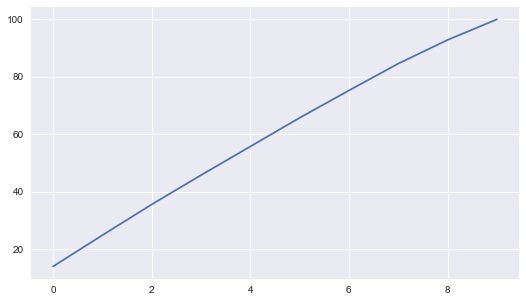

In [248]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [249]:
# create pipeline
PCA_VARS = 8
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [250]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

C:\Users\HELLO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5836076971841067

In [251]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[11737  8327]
 [  446   448]]
Sensitivity: 	0.5
Specificity: 	0.58
AUC:    	 0.55


#### Predictive power of the demographic data is not that significant. Important Variables from Deomgraphic data were 'Income','Profession' and 'No of Months in Current Company'

### Master Dataframe

In [252]:
master_df.drop('Performance Tag',axis=1,inplace=True)
master_df.shape

(69859, 30)

In [253]:
#Sum of column-wise missing values
round(master_df.isnull().sum(),2)

Application_ID                                                        0
Age                                                                   0
Gender                                                                0
Marital_Status                                                        0
No_of_dependents                                                      0
Income                                                                0
Education                                                             0
Profession                                                            0
Type_of_residence                                                     0
Months_in_current_residence                                           0
Months_in_current_company                                             0
Event                                                                 0
Application ID                                                        0
No of times 90 DPD or worse in last 6 months                    

In [254]:
#Average CC utilization has some missing values. Lets look into that

In [255]:
avg_cc = master_df.loc[~np.isnan(master_df['Avgas CC Utilization in last 12 months'])]
avg_cc.head(5)

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


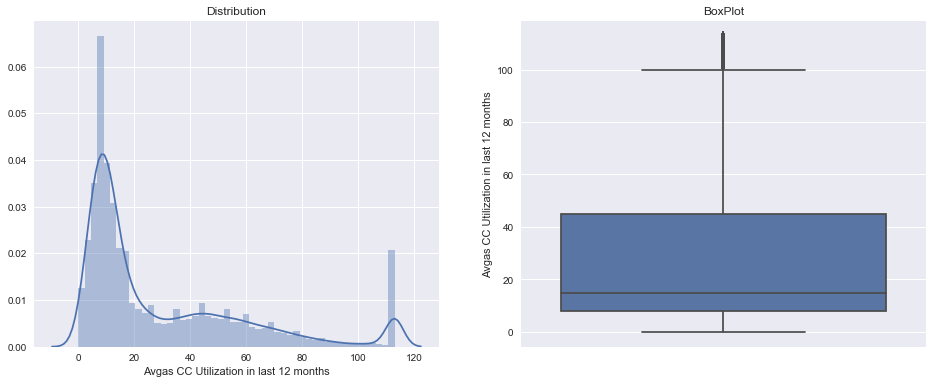

In [256]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(avg_cc['Avgas CC Utilization in last 12 months'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=avg_cc['Avgas CC Utilization in last 12 months'])

In [257]:
#Data is left skewed. Lets see what is closest median or mean.
print(avg_cc['Avgas CC Utilization in last 12 months'].median())
print(avg_cc['Avgas CC Utilization in last 12 months'].mean())

15.0
29.263365099657157


In [258]:
#Median seems more suitables.Lets replace the values with Median
master_df.loc[pd.isnull(master_df['Avgas CC Utilization in last 12 months']),['Avgas CC Utilization in last 12 months']] = 15

In [259]:
master_df['Avgas CC Utilization in last 12 months'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.975,1.0])

count    69859.000000
mean        29.054495
std         29.347635
min          0.000000
5%           3.000000
10%          5.000000
25%          8.000000
50%         15.000000
75%         44.000000
80%         52.000000
90%         72.000000
95%        103.000000
97.5%      113.000000
100%       113.000000
max        113.000000
Name: Avgas CC Utilization in last 12 months, dtype: float64

In [260]:
master_df.loc[master_df['Avgas CC Utilization in last 12 months']>103,'Event'].sum()

168.0

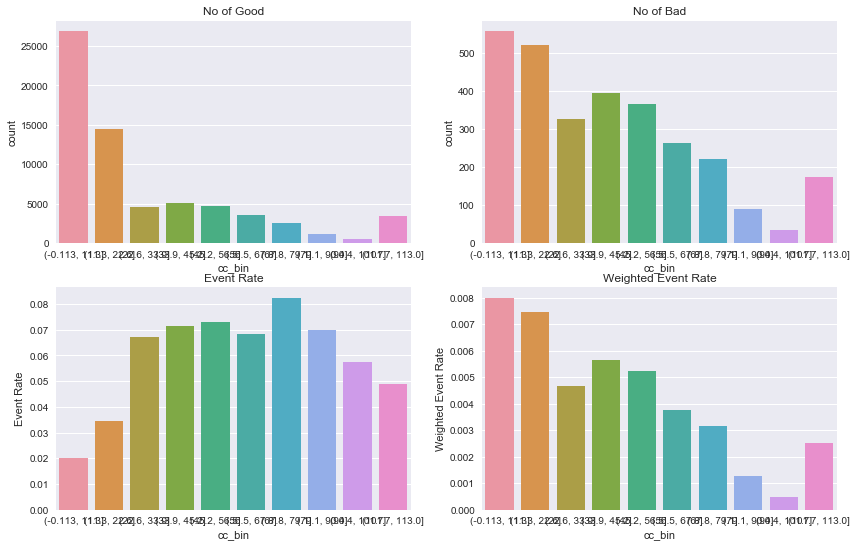

In [261]:
master_df['cc_bin'] = pd.cut(master_df['Avgas CC Utilization in last 12 months'],bins=10)
plot_categorical_variables(master_df,'cc_bin','Event')

In [262]:
#Sum of column-wise missing values
round(master_df.isnull().sum(),2)

Application_ID                                                       0
Age                                                                  0
Gender                                                               0
Marital_Status                                                       0
No_of_dependents                                                     0
Income                                                               0
Education                                                            0
Profession                                                           0
Type_of_residence                                                    0
Months_in_current_residence                                          0
Months_in_current_company                                            0
Event                                                                0
Application ID                                                       0
No of times 90 DPD or worse in last 6 months                         0
No of 

In [263]:
master_df.drop('cc_bin',axis=1,inplace=True)

In [264]:
master_df.loc[pd.isnull(master_df['No of trades opened in last 6 months']),'Event']

66585    0.0
Name: Event, dtype: float64

In [265]:
master_df = master_df.loc[~pd.isnull(master_df['No of trades opened in last 6 months'])]

In [266]:
master_df.isnull().sum().sort_values(ascending=False).head()

Outstanding Balance                             272
Presence of open home loan                      272
Presence of open auto loan                        0
No of times 90 DPD or worse in last 6 months      0
Age                                               0
dtype: int64

In [267]:
#Lets look into Outstanding Balance

In [268]:
ob = master_df.loc[~np.isnan(master_df['Outstanding Balance'])]
ob.head(5)

,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,Months_in_current_residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


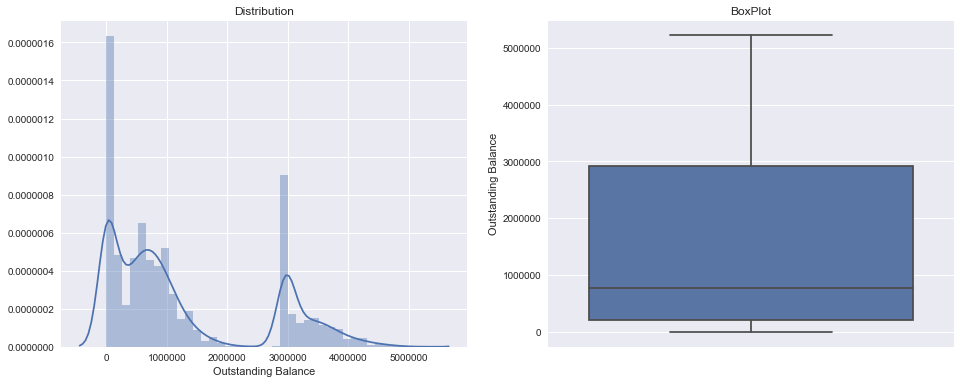

In [269]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(ob['Outstanding Balance'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=ob['Outstanding Balance'])

In [270]:
print(ob['Outstanding Balance'].median())
ob['Outstanding Balance'].mean()

774273.0


1253442.7686172505

In [271]:
#Median seems more suitables.Lets replace the values with Median
master_df.loc[pd.isnull(master_df['Outstanding Balance']),['Outstanding Balance']] = 774273.0

C:\Users\HELLO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


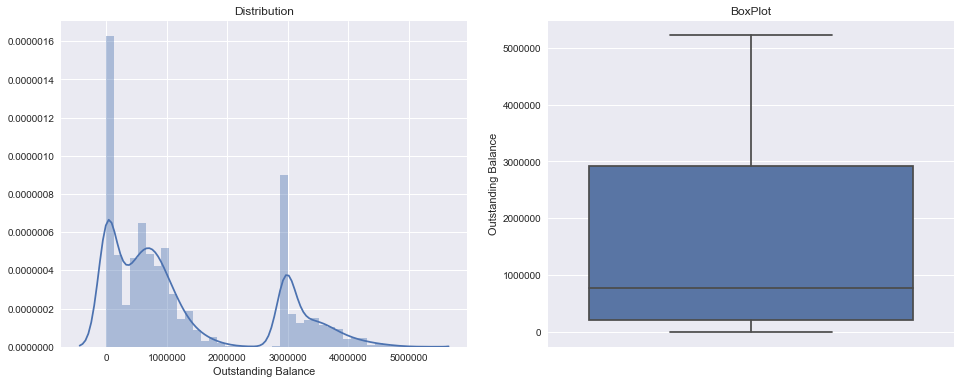

In [272]:
# subplot 1
sns.set(rc={'figure.figsize':(16,6)})
plt.subplot(1, 2, 1)
plt.title('Distribution')
sns.distplot(master_df['Outstanding Balance'])

# subplot 2
plt.subplot(1, 2, 2)
plt.title('BoxPlot')
sns.boxplot(y=master_df['Outstanding Balance'])

In [273]:
master_df.isnull().sum().sort_values(ascending=False).head()

Presence of open home loan                      272
Presence of open auto loan                        0
No of times 90 DPD or worse in last 6 months      0
Age                                               0
Gender                                            0
dtype: int64

In [274]:
master_df.loc[pd.isnull(master_df['Presence of open home loan']),'Event'].sum()/272

0.029411764705882353

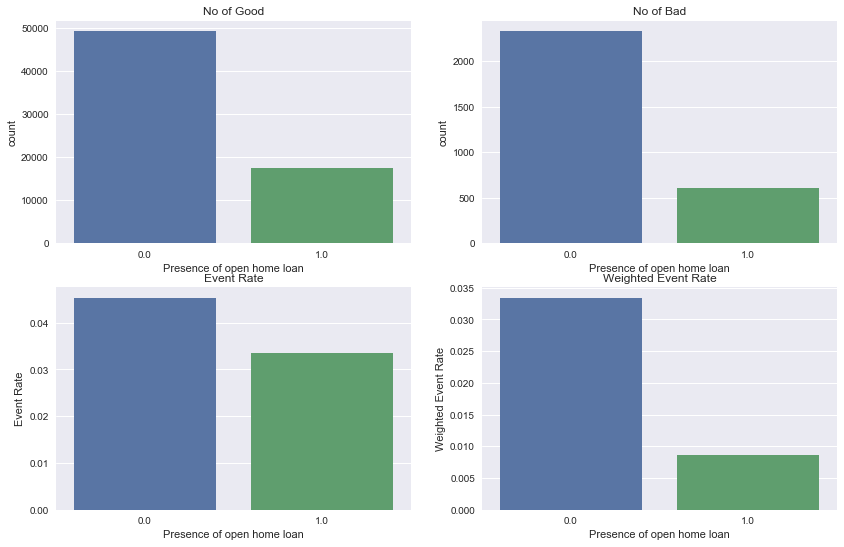

In [275]:
plot_categorical_variables(master_df,'Presence of open home loan','Event')

In [276]:
#Since the event rate of "Presence of open home loan" with value 1 has similar event rate as that of missing value. Lets assign this as 1
master_df.loc[pd.isnull(master_df['Presence of open home loan']),['Presence of open home loan']] = 1.0

In [277]:
master_df.isnull().sum().sort_values(ascending=False).head()

Presence of open auto loan    0
Total No of Trades            0
Age                           0
Gender                        0
Marital_Status                0
dtype: int64

In [278]:
master_df.shape

(69858, 30)

In [279]:
master_df.columns

Index(['Application_ID', 'Age', 'Gender', 'Marital_Status', 'No_of_dependents',
       'Income', 'Education', 'Profession', 'Type_of_residence',
       'Months_in_current_residence', 'Months_in_current_company', 'Event',
       'Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan',

In [280]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69858 entries, 0 to 69858
Data columns (total 30 columns):
Application_ID                                                     69858 non-null int64
Age                                                                69858 non-null int64
Gender                                                             69858 non-null object
Marital_Status                                                     69858 non-null object
No_of_dependents                                                   69858 non-null float64
Income                                                             69858 non-null float64
Education                                                          69858 non-null object
Profession                                                         69858 non-null object
Type_of_residence                                                  69858 non-null object
Months_in_current_residence                                        69858 non-null int64
Mo

### No. Of 90 day DPDs in last 6 and 12 months

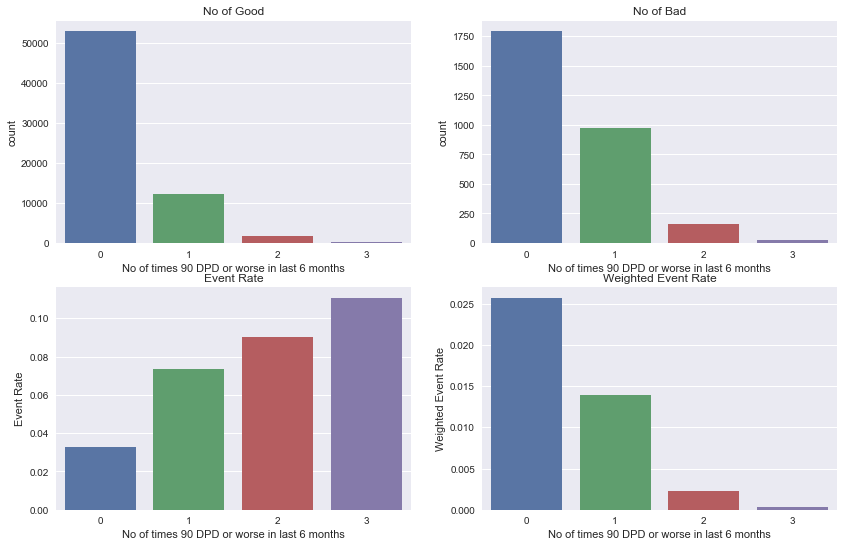

In [281]:
master_df['No of times 90 DPD or worse in last 6 months'].astype = 'object'
plot_categorical_variables(master_df,'No of times 90 DPD or worse in last 6 months','Event')

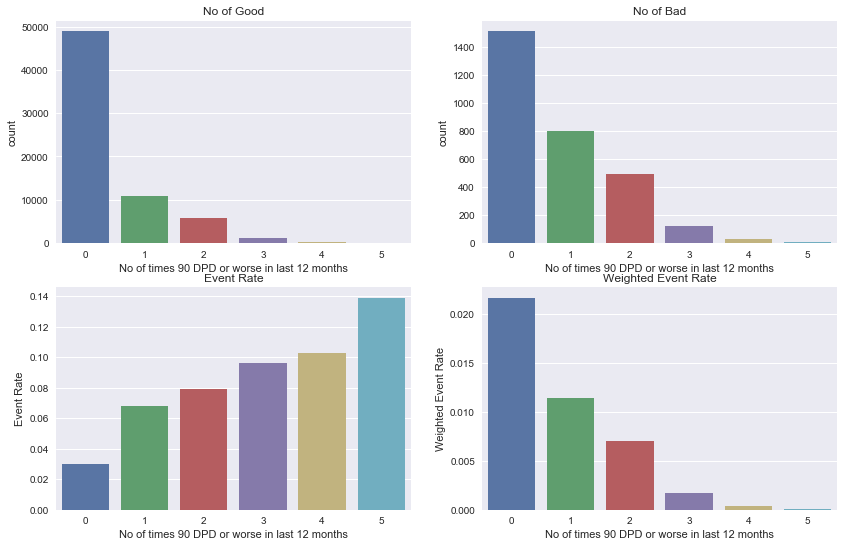

In [282]:
master_df['No of times 90 DPD or worse in last 12 months'].astype = 'object'
plot_categorical_variables(master_df,'No of times 90 DPD or worse in last 12 months','Event')

### Event rate follows linear pattern in both 6 and 12 months

### No. Of 60 day DPDs in last 6 and 12 months

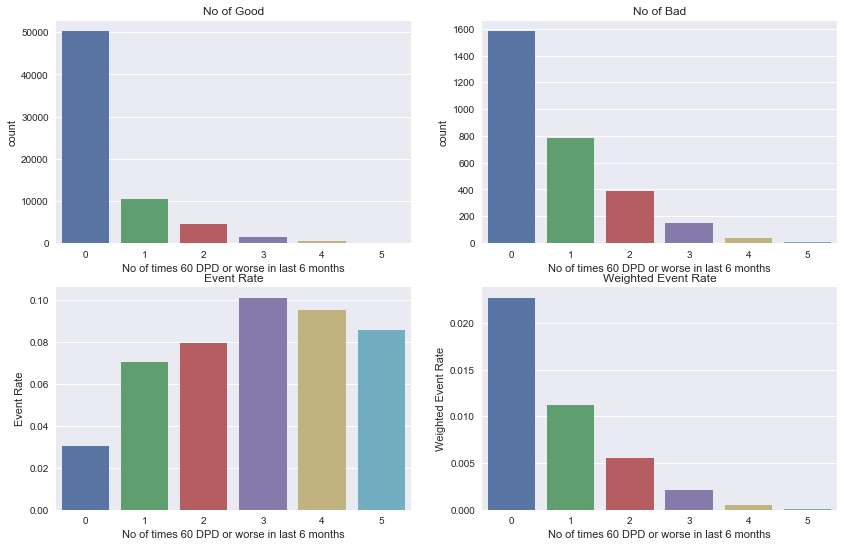

In [283]:
master_df['No of times 60 DPD or worse in last 6 months'].astype = 'object'
plot_categorical_variables(master_df,'No of times 60 DPD or worse in last 6 months','Event')

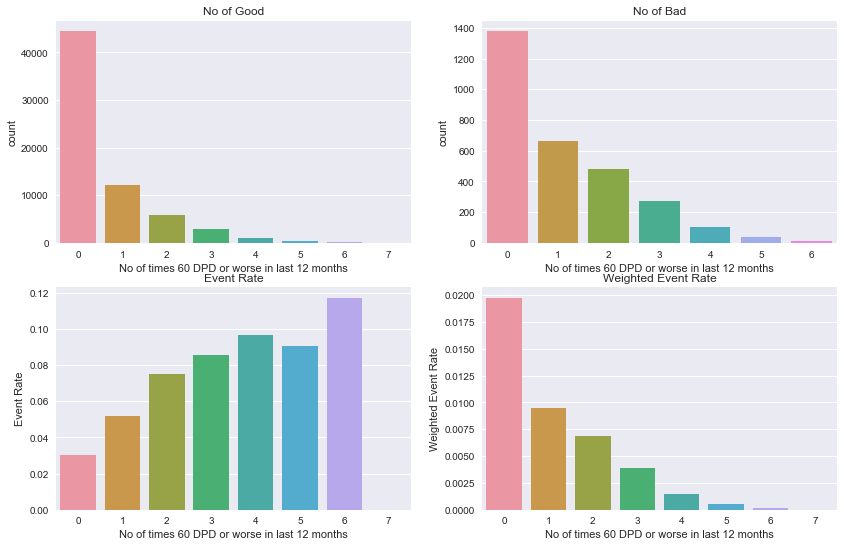

In [284]:
master_df['No of times 60 DPD or worse in last 12 months'].astype = 'object'
plot_categorical_variables(master_df,'No of times 60 DPD or worse in last 12 months','Event')

### 60 DPD in 12 months have a better linear relationship than 60 DPD in 6 months

### Analysing - No. of Trades

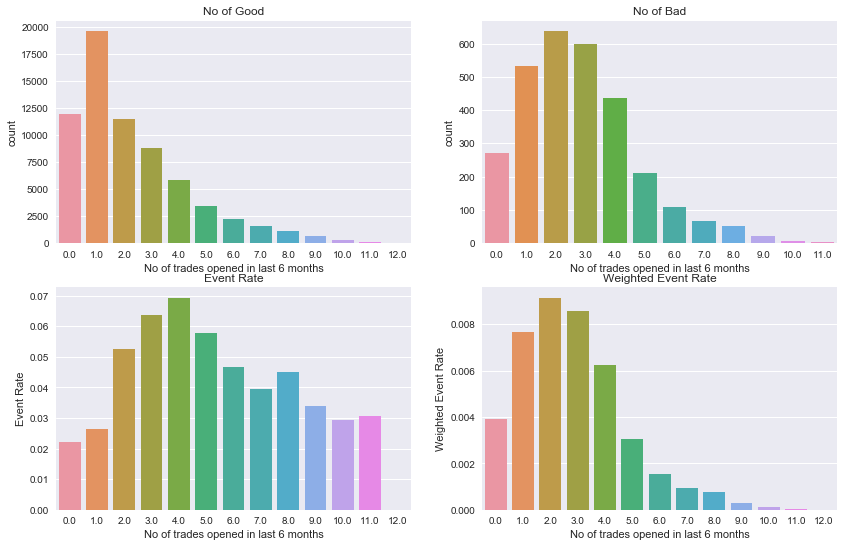

In [285]:
master_df['No of trades opened in last 6 months'].astype = 'object'
plot_categorical_variables(master_df,'No of trades opened in last 6 months','Event')

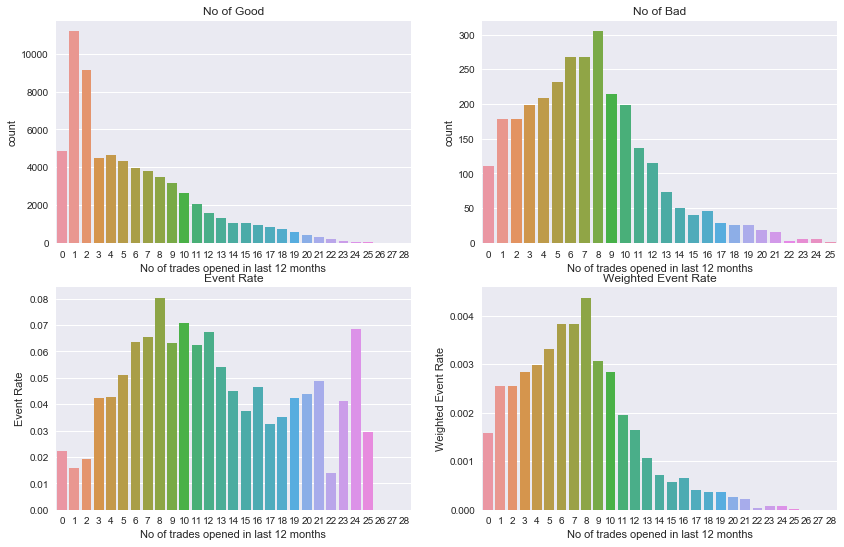

In [286]:
master_df['No of trades opened in last 12 months'].astype = 'object'
plot_categorical_variables(master_df,'No of trades opened in last 12 months','Event')

#### Lets look at collinearity between the variables as most of them seem to follow the similar pattern

In [287]:
corr = master_df.corr()

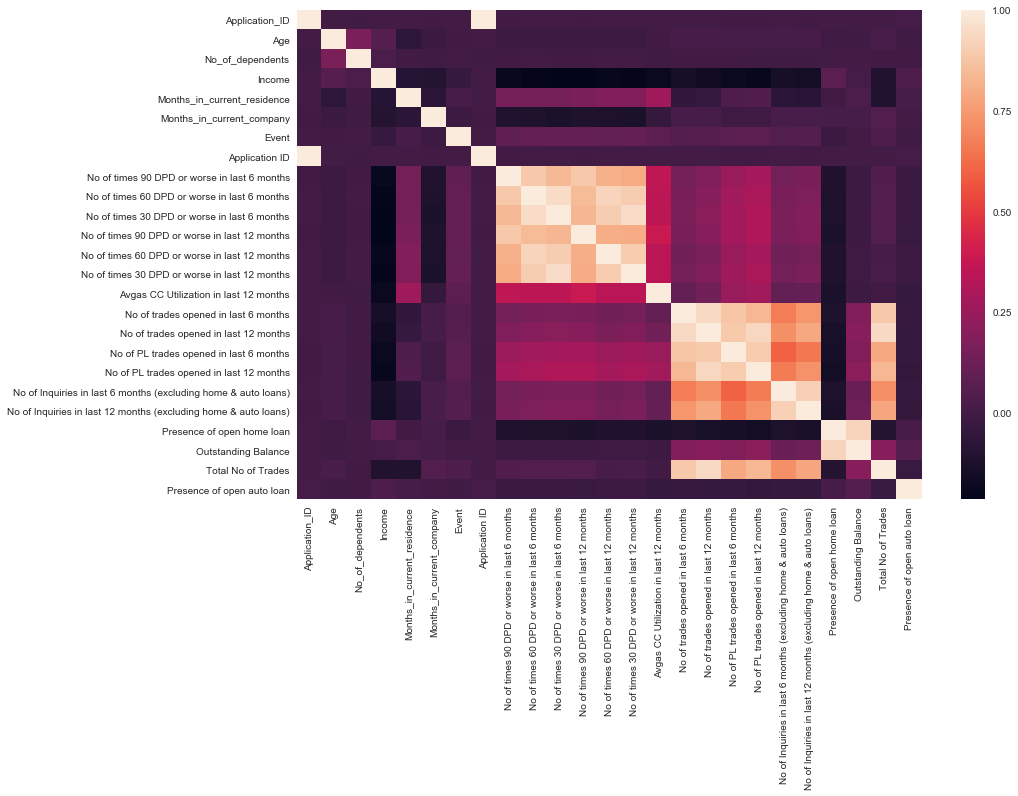

In [288]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### All of the DPD variables are highly collinear and so are the trade variables. Lets calculate IV and pick the variables that has higher predictive power

In [289]:
master_df.to_csv("Master_DF_Raw.csv")

### Creating Bins for Numerical Values

In [290]:
def create_bins(data):
    cols = data.columns
    for ivars in cols[~cols.isin(['Application_ID'])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            data[ivars+'_bin'] = pd.qcut(data[ivars],q=10,  duplicates='drop')
            data.drop(ivars,inplace=True,axis=1)
    return data

In [291]:
master_df2 = create_bins(master_df)
master_df2.head(5)

,Application_ID,Gender,Marital_Status,No_of_dependents,Education,Profession,Type_of_residence,Event,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Months_in_current_company_bin,Application ID_bin,Avgas CC Utilization in last 12 months_bin,No of trades opened in last 6 months_bin,No of trades opened in last 12 months_bin,No of PL trades opened in last 12 months_bin,No of Inquiries in last 6 months (excluding home & auto loans)_bin,No of Inquiries in last 12 months (excluding home & auto loans)_bin,Outstanding Balance_bin,Total No of Trades_bin
0,954457215,F,Married,2.0,Bachelor,SAL,Rented,0.0,0,0,...,"(54.0, 62.0]","(899554155.6, 1000084142.0]","(-0.001, 5.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(2960649.2, 3279433.2]","(3.0, 4.0]"
1,432830445,M,Married,4.0,Professional,SE_PROF,Rented,0.0,0,0,...,"(41.0, 48.0]","(399391968.6, 497980112.5]","(-0.001, 5.0]","(-0.001, 1.0]","(1.0, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 6883.0]","(4.0, 5.0]"
2,941387308,M,Single,2.0,Bachelor,SE_PROF,Rented,0.0,0,0,...,"(48.0, 54.0]","(899554155.6, 1000084142.0]","(5.0, 7.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(2960649.2, 3279433.2]","(-0.001, 2.0]"
3,392161677,M,Married,1.0,Bachelor,SE,Rented,0.0,0,0,...,"(48.0, 54.0]","(298563879.0, 399391968.6]","(9.0, 12.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(3279433.2, 5218801.0]","(3.0, 4.0]"
4,182011211,F,Married,5.0,Professional,SAL,Rented,0.0,0,0,...,"(41.0, 48.0]","(99501285.0, 199471249.0]","(9.0, 12.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(2960649.2, 3279433.2]","(3.0, 4.0]"


In [292]:
def convert_to_object(data,target):
    cols = data.columns
    for i in cols[~cols.isin([target,'Application_ID'])]:
           data[i] = data[i].astype(str)
    return data

In [293]:
master_df2 = convert_to_object(master_df2,'Event')
master_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69858 entries, 0 to 69858
Data columns (total 30 columns):
Application_ID                                                         69858 non-null int64
Gender                                                                 69858 non-null object
Marital_Status                                                         69858 non-null object
No_of_dependents                                                       69858 non-null object
Education                                                              69858 non-null object
Profession                                                             69858 non-null object
Type_of_residence                                                      69858 non-null object
Event                                                                  69858 non-null float64
No of times 90 DPD or worse in last 6 months                           69858 non-null object
No of times 60 DPD or worse in last 6 months          

In [294]:
iv_m,woe_m = iv_woe(master_df2,target='Event',show_woe=False)

Information value of Gender is 0.000326
Information value of Marital_Status is 9.6e-05
Information value of No_of_dependents is 0.002652
Information value of Education is 0.000784
Information value of Profession is 0.002229
Information value of Type_of_residence is 0.000925
Information value of No of times 90 DPD or worse in last 6 months is 0.162684
Information value of No of times 60 DPD or worse in last 6 months is 0.211313
Information value of No of times 30 DPD or worse in last 6 months is 0.244292
Information value of No of times 90 DPD or worse in last 12 months is 0.215669
Information value of No of times 60 DPD or worse in last 12 months is 0.188259
Information value of No of times 30 DPD or worse in last 12 months is 0.218649
Information value of No of PL trades opened in last 6 months is 0.224215
Information value of Presence of open home loan is 0.017566
Information value of Presence of open auto loan is 0.001657
Information value of Age_bin is 0.004142
Information value of

## Function to replace WoE values

In [295]:
def replace_woe_values(data,target,woe):
    cols = data.columns
    
    for i in cols[~cols.isin([target,'Application_ID'])]:
        uniques = data[i].unique().tolist()
        dict1 = {}
        print(i,"$",uniques)
        for j in uniques:
            dict1[j] = woe.loc[(woe['Cutoff']==j) & (woe['Variable']==i),'WoE'].values[0]
        data[i] = data[i].map(dict1)
    return data

In [296]:
master_df3 = replace_woe_values(master_df2,'Event',woe_m)

Gender $ ['F', 'M']
Marital_Status $ ['Married', 'Single']
No_of_dependents $ ['2.0', '4.0', '1.0', '5.0', '3.0']
Education $ ['Bachelor', 'Professional', 'Masters', 'Phd', 'Others']
Profession $ ['SAL', 'SE_PROF', 'SE']
Type_of_residence $ ['Rented', 'Owned', 'Others', 'Living with Parents', 'Company provided']
No of times 90 DPD or worse in last 6 months $ ['0', '1', '2', '3']
No of times 60 DPD or worse in last 6 months $ ['0', '1', '2', '3', '4', '5']
No of times 30 DPD or worse in last 6 months $ ['0', '1', '2', '3', '4', '5', '6', '7']
No of times 90 DPD or worse in last 12 months $ ['0', '1', '2', '3', '4', '5']
No of times 60 DPD or worse in last 12 months $ ['0', '1', '2', '3', '4', '5', '6', '7']
No of times 30 DPD or worse in last 12 months $ ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
No of PL trades opened in last 6 months $ ['0', '1', '2', '5', '4', '3', '6']
Presence of open home loan $ ['1.0', '0.0']
Presence of open auto loan $ ['0', '1']
Age_bin $ ['(45.0, 48.0

In [297]:
master_df3.head(5)

,Application_ID,Gender,Marital_Status,No_of_dependents,Education,Profession,Type_of_residence,Event,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Months_in_current_company_bin,Application ID_bin,Avgas CC Utilization in last 12 months_bin,No of trades opened in last 6 months_bin,No of trades opened in last 12 months_bin,No of PL trades opened in last 12 months_bin,No of Inquiries in last 6 months (excluding home & auto loans)_bin,No of Inquiries in last 12 months (excluding home & auto loans)_bin,Outstanding Balance_bin,Total No of Trades_bin
0,954457215,0.0322,-0.0041,-0.0852,0.0173,-0.0284,-0.0045,0.0,-0.2607,-0.3364,...,-0.2287,0.0151,-0.8723,-0.5433,-0.8165,-0.6865,-0.3201,-0.8283,-0.8428,-0.4480
1,432830445,-0.0101,-0.0041,-0.0253,-0.0180,-0.0132,-0.0045,0.0,-0.2607,-0.3364,...,-0.1493,0.0596,-0.8723,-0.5433,-0.8165,-0.6865,-0.3201,-0.8283,-0.7747,-0.0486
2,941387308,-0.0101,0.0234,-0.0852,0.0173,-0.0132,-0.0045,0.0,-0.2607,-0.3364,...,-0.2550,0.0151,-0.7786,-0.5433,-0.8939,-0.6865,-0.3201,-0.8283,-0.8428,-0.8777
3,392161677,-0.0101,-0.0041,0.0400,0.0173,0.0914,-0.0045,0.0,-0.2607,-0.3364,...,-0.2550,0.0012,-0.6089,-0.5433,-0.8939,-0.6865,-0.3201,-0.8283,0.2972,-0.4480
4,182011211,0.0322,-0.0041,0.0043,-0.0180,-0.0284,-0.0045,0.0,-0.2607,-0.3364,...,-0.1493,-0.0684,-0.6089,-0.5433,-0.8939,-0.6865,-0.3201,-0.8283,-0.8428,-0.4480


In [298]:
master_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69858 entries, 0 to 69858
Data columns (total 30 columns):
Application_ID                                                         69858 non-null int64
Gender                                                                 69858 non-null float64
Marital_Status                                                         69858 non-null float64
No_of_dependents                                                       69858 non-null float64
Education                                                              69858 non-null float64
Profession                                                             69858 non-null float64
Type_of_residence                                                      69858 non-null float64
Event                                                                  69858 non-null float64
No of times 90 DPD or worse in last 6 months                           69858 non-null float64
No of times 60 DPD or worse in last 6 months   

In [299]:
iv_m.sort_values(by="IV",ascending=False)

,Variable,IV
0,Avgas CC Utilization in last 12 months_bin,0.312610
0,No of trades opened in last 12 months_bin,0.293571
0,No of PL trades opened in last 12 months_bin,0.258567
0,No of Inquiries in last 12 months (excluding h...,0.245253
0,No of times 30 DPD or worse in last 6 months,0.244292
0,Outstanding Balance_bin,0.242738
0,Total No of Trades_bin,0.232259
0,No of PL trades opened in last 6 months,0.224215
0,No of times 30 DPD or worse in last 12 months,0.218649
0,No of times 90 DPD or worse in last 12 months,0.215669


### Selecting Features after considering IV values and collinearity

In [300]:
Final_features = ['Application_ID','Event','Avgas CC Utilization in last 12 months_bin','No of trades opened in last 12 months_bin','No of times 90 DPD or worse in last 12 months',
                  'Outstanding Balance_bin','Months_in_current_residence_bin','Income_bin','Months_in_current_company_bin']

In [301]:
master_df4 = pd.DataFrame(master_df3[Final_features])
print(master_df4.head())
master_df4.to_csv("Master Data with WOE values.csv")

   Application_ID  Event  Avgas CC Utilization in last 12 months_bin  \
0       954457215    0.0                                     -0.8723   
1       432830445    0.0                                     -0.8723   
2       941387308    0.0                                     -0.7786   
3       392161677    0.0                                     -0.6089   
4       182011211    0.0                                     -0.6089   

   No of trades opened in last 12 months_bin  \
0                                    -0.8165   
1                                    -0.8165   
2                                    -0.8939   
3                                    -0.8939   
4                                    -0.8939   

   No of times 90 DPD or worse in last 12 months  Outstanding Balance_bin  \
0                                        -0.3566                  -0.8428   
1                                        -0.3566                  -0.7747   
2                                        -0.356

In [302]:
woe_m.to_csv("woe_m.csv")

In [303]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

master_df = pd.read_csv("Master Data with WOE values.csv", sep=",")
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 10 columns):
Unnamed: 0                                       69858 non-null int64
Application_ID                                   69858 non-null int64
Event                                            69858 non-null float64
Avgas CC Utilization in last 12 months_bin       69858 non-null float64
No of trades opened in last 12 months_bin        69858 non-null float64
No of times 90 DPD or worse in last 12 months    69858 non-null float64
Outstanding Balance_bin                          69858 non-null float64
Months_in_current_residence_bin                  69858 non-null float64
Income_bin                                       69858 non-null float64
Months_in_current_company_bin                    69858 non-null float64
dtypes: float64(8), int64(2)
memory usage: 5.3 MB


In [305]:
master_df.drop('Unnamed: 0',axis=1,inplace=True)

In [306]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = master_df.drop(['Event'],axis=1)

# Putting response variable to y
y = master_df['Event']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [307]:
#Checking Event Rate After Splitting
print(y_train.mean())
print(y_test.mean())

0.042188139059304706
0.04217959728981773


In [308]:
X_train = X_train.drop('Application_ID', axis = 1)
Application_ID = X_test['Application_ID']
X_test = X_test.drop('Application_ID', axis = 1)

In [309]:
X_train = X_train.values
X_train

array([[ 0.4752,  0.0174, -0.3566, ..., -0.253 ,  0.1158,  0.1002],
       [ 0.3606,  0.3168, -0.3566, ...,  0.1217, -0.1466,  0.1967],
       [ 0.5902,  0.4033, -0.3566, ...,  0.1226,  0.0791, -0.1493],
       ...,
       [ 0.5902,  0.3168,  0.5087, ..., -0.0693, -0.1695,  0.1967],
       [-0.7286, -0.8939, -0.3566, ..., -0.253 , -0.1695, -0.0684],
       [ 0.4752,  0.5756,  0.6699, ...,  0.4733,  0.3533,  0.102 ]])

# Logistic Regression

In [310]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
c = [0.001,0.01,0.1,1.0,10.0,100.0]
num_cv_splits = 5
kf = KFold(n_splits=num_cv_splits, random_state=5)
for C in c:
    auc = 0.0
    acc = 0.0
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        Y_train_cv, Y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = LogisticRegression(C=C, random_state=5)
        clf.fit(X_train_cv,Y_train_cv)
        acc += clf.score(X_test_cv,Y_test_cv)
        pred = clf.predict_proba(X_test_cv)[:,1]
        auc += roc_auc_score(y_true = Y_test_cv, y_score = pred)
    print('C =',C,'; mean accuracy =',acc/num_cv_splits,'; auc =',auc/num_cv_splits)

C = 0.001 ; mean accuracy = 0.9578118609406954 ; auc = 0.6651926128671732
C = 0.01 ; mean accuracy = 0.9578118609406954 ; auc = 0.6655802405670123
C = 0.1 ; mean accuracy = 0.9578118609406954 ; auc = 0.6650572024787109
C = 1.0 ; mean accuracy = 0.9578118609406954 ; auc = 0.6647841655076172
C = 10.0 ; mean accuracy = 0.9578118609406954 ; auc = 0.6647469191187569
C = 100.0 ; mean accuracy = 0.9578118609406954 ; auc = 0.6647451862583672


### Reading Raw Data for Decision Trees

In [312]:
df = pd.read_csv("Master_DF_Raw.csv", sep=",")
df.head(5)

,Unnamed: 0,Application_ID,Age,Gender,Marital_Status,No_of_dependents,Income,Education,Profession,Type_of_residence,...,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,...,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,...,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,...,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,...,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,...,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [313]:
Final_features = ['Application_ID','Event','Avgas CC Utilization in last 12 months','No of trades opened in last 12 months','No of times 90 DPD or worse in last 12 months',
                  'Outstanding Balance','Months_in_current_residence','Income','Months_in_current_company']
master_df = pd.DataFrame(df[Final_features])
master_df.head(5)

,Application_ID,Event,Avgas CC Utilization in last 12 months,No of trades opened in last 12 months,No of times 90 DPD or worse in last 12 months,Outstanding Balance,Months_in_current_residence,Income,Months_in_current_company
0,954457215,0.0,4.0,2,0,2999395.0,113,40.0,56
1,432830445,0.0,3.0,2,0,3078.0,112,55.0,46
2,941387308,0.0,7.0,0,0,3004972.0,104,46.0,49
3,392161677,0.0,11.0,1,0,3355373.0,94,53.0,53
4,182011211,0.0,12.0,1,0,3014283.0,112,44.0,43


In [314]:
# Putting feature variable to X
X = master_df.drop(['Event'],axis=1)

# Putting response variable to y
y = master_df['Event']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

In [315]:
#Checking Event Rate After Splitting
print(y_train.mean())
print(y_test.mean())

0.042188139059304706
0.04217959728981773


In [316]:
X_train = X_train.drop('Application_ID', axis = 1)
Application_ID = X_test['Application_ID']
X_test = X_test.drop('Application_ID', axis = 1)

In [317]:
#smt = SMOTE(random_state=2)
#X_train_res, y_train_res = smt.fit_sample(X_train, y_train.ravel())

#y_train_res = pd.Series(y_train_res)

In [318]:
X_train = X_train.values

# Decision Trees

In [319]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
depths = [3,4,5,6,7,8,9,10,11]

In [320]:
num_cv_splits = 5
kf = KFold(n_splits=num_cv_splits, random_state=5)
for depth in depths:
    auc = 0.0
    acc = 0.0
    for train_index, test_index in kf.split(X_train):
        X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
        Y_train_cv, Y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = DecisionTreeClassifier(max_depth=depth, random_state=5)
        clf.fit(X_train_cv,Y_train_cv)
        acc += clf.score(X_test_cv,Y_test_cv)
        pred = clf.predict_proba(X_test_cv)[:,1]
        auc += roc_auc_score(y_true = Y_test_cv, y_score = pred)
    print('depth =', depth, '; mean accuracy =', acc/num_cv_splits, '; auc =', auc/num_cv_splits)

depth = 3 ; mean accuracy = 0.9577914110429449 ; auc = 0.6478816993729293
depth = 4 ; mean accuracy = 0.9577300613496933 ; auc = 0.6559626707934711
depth = 5 ; mean accuracy = 0.9575460122699389 ; auc = 0.6563883763848073
depth = 6 ; mean accuracy = 0.95719836400818 ; auc = 0.6548185604588765
depth = 7 ; mean accuracy = 0.9564621676891616 ; auc = 0.6497675310906583
depth = 8 ; mean accuracy = 0.9560531697341513 ; auc = 0.6441730241734721
depth = 9 ; mean accuracy = 0.9552556237218812 ; auc = 0.6326929446438664
depth = 10 ; mean accuracy = 0.9539263803680982 ; auc = 0.6236647883533284
depth = 11 ; mean accuracy = 0.9522494887525562 ; auc = 0.6104325238173904


In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
num_trees = [25,50,75,100,125,150,175,200,225,250]
max_depth = [3,4,5,6]
num_cv_splits = 5

In [322]:
kf = KFold(n_splits=num_cv_splits, random_state=5, shuffle = True)
for tree in num_trees:
    for depth in max_depth:
        auc = 0.0
        acc = 0.0
        for train_index, test_index in kf.split(X_train):
            X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
            Y_train_cv, Y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
            clf = RandomForestClassifier(n_estimators=tree, max_depth=depth, n_jobs = 8, random_state=5)
            clf.fit(X_train_cv,Y_train_cv)
            acc += clf.score(X_test_cv,Y_test_cv)
            pred = clf.predict_proba(X_test_cv)[:,1]
            auc += roc_auc_score(y_true = Y_test_cv, y_score = pred)
        print('num_trees =',tree,'; depth=',depth,'; mean accuracy =',acc/num_cv_splits,'; auc =',auc/num_cv_splits)

num_trees = 25 ; depth= 3 ; mean accuracy = 0.9578118609406954 ; auc = 0.668801986895239
num_trees = 25 ; depth= 4 ; mean accuracy = 0.9578118609406954 ; auc = 0.6687651017121556
num_trees = 25 ; depth= 5 ; mean accuracy = 0.9578118609406954 ; auc = 0.6681155007637003
num_trees = 25 ; depth= 6 ; mean accuracy = 0.9578118609406954 ; auc = 0.6691646618837966
num_trees = 50 ; depth= 3 ; mean accuracy = 0.9578118609406954 ; auc = 0.6679193832401824
num_trees = 50 ; depth= 4 ; mean accuracy = 0.9578118609406954 ; auc = 0.669420278628654
num_trees = 50 ; depth= 5 ; mean accuracy = 0.9578118609406954 ; auc = 0.670053733773015
num_trees = 50 ; depth= 6 ; mean accuracy = 0.9578118609406954 ; auc = 0.6697772981243839
num_trees = 75 ; depth= 3 ; mean accuracy = 0.9578118609406954 ; auc = 0.6679746587166271
num_trees = 75 ; depth= 4 ; mean accuracy = 0.9578118609406954 ; auc = 0.6698787158183739
num_trees = 75 ; depth= 5 ; mean accuracy = 0.9578118609406954 ; auc = 0.6707814922729776
num_trees = 7

In [328]:
# Final model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
num_trees = 125
max_depth = 6
clf = RandomForestClassifier(n_estimators=num_trees, max_depth=max_depth, n_jobs = 4, random_state=5)
# parameter grid
param_grid = {"learning_rate": [0.005, 0.01, 0.05, 0.1, 0.5, 1]}
# adaboost with the default tree as base estimator and SAMMME.R for faster convergence
ABC = AdaBoostClassifier(
    base_estimator=clf,
    algorithm="SAMME.R", random_state=10, n_estimators=10)
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds, 
                               scoring = 'roc_auc',
                               param_grid=param_grid,
                               return_train_score=True,                         
                               verbose = 5, n_jobs=-1)
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:  5.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=5,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_s

In [329]:
#clf.fit(X_train_res,y_train_res)
pred = grid_search_ABC.predict_proba(X_test)
auc = roc_auc_score(y_true = y_test, y_score = pred[:,1])
print('num_trees =',num_trees,'; depth=',max_depth,'; auc =',auc)

num_trees = 175 ; depth= 5 ; auc = 0.6910857429321465


In [336]:
#Application Scorecard
from sklearn import metrics
score_data = pd.concat([Application_ID,y_test], axis=1)
score_data['bad'] = pred[:,0]
score_data['good'] = pred[:,1]
score_data['odds'] = np.log(score_data['good']/score_data['bad'])
PDO = 20.0
BaseScore = 400.0
Odds = 10.0
Factor = PDO/np.log(2)
Offset = BaseScore-(Factor*np.log(Odds))
score_data['score'] = np.round(Offset+(Factor*score_data['odds']))

fpr, tpr, thresholds = metrics.roc_curve(y_true = y_test, y_score = pred[:,1])
cut_off_prediction_probability_score = thresholds[np.argmax(tpr-fpr)]
cut_off_score = np.round(Offset+(Factor*np.log(cut_off_prediction_probability_score/(1-cut_off_prediction_probability_score))))
print('Cut off Score:', cut_off_score, '; Cut Off Probability:', cut_off_prediction_probability_score)


reject = score_data[score_data['Event'] == 1.0]
#print(reject['score'].describe())

approved = score_data[score_data['Event'] == 0.0]
#print(approved['score'].describe())

Cut off Score: 247.0 ; Cut Off Probability: 0.04739872769732965


In [337]:
reject['score'].describe()

count    884.000000
mean     251.329186
std       14.203313
min      208.000000
25%      245.000000
50%      256.000000
75%      262.000000
max      281.000000
Name: score, dtype: float64

In [338]:
approved['score'].describe()

count    20074.000000
mean       240.006177
std         17.668374
min        207.000000
25%        222.000000
50%        242.000000
75%        257.000000
max        301.000000
Name: score, dtype: float64

# Cost Benefit Analysis

### Assumption: Lets say that banks make 2% profit on the credits granted to customers and makes 100% loss when the customers have defaulted. 

### We set the cut-off score at 250 below which the bank is not granting credit cards to customers. Lets see how much the bank has made or lost if the bank gave credits to customers having credit score of 250 or below

In [367]:
df1 = reject.merge(credit_df,left_on='Application_ID',right_on='Application ID',how='left')
print(reject.shape)
print(df1.shape)
print(df1.columns)

(884, 6)
(884, 25)
Index(['Application_ID', 'Event', 'bad', 'good', 'odds', 'score',
       'Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')


In [368]:
# Total Amount the bank might have lost - 
loss = df1.loc[df1['score']<250,'Outstanding Balance'].sum()
loss

336150105.0

In [369]:
# Total Amount the bank might have made - 
df2= approved.merge(credit_df,left_on='Application_ID',right_on='Application ID',how='left')
profit = df2.loc[df2['score']<250,'Outstanding Balance'].sum()*0.02
profit

300437226.02